<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/MathematicalAnalysis/%D0%93%D0%BB%D0%B0%D0%B2%D0%B0_4_%D0%9E%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Глава 4. Оптимизация


#### Часть 1: Градиентный спуск и его вариации

Оптимизация в математике и вычислительных науках касается нахождения минимального или максимального значения функции. В контексте машинного обучения и анализа данных, оптимизация применяется для минимизации функции потерь, чтобы найти параметры модели, которые обеспечивают наилучшую производительность.

Градиентный спуск — это один из наиболее часто используемых методов оптимизации, особенно при обучении нейронных сетей. Давайте начнем с базовых понятий.

#### 1.1. Основы градиентного спуска

##### Определение градиента

Пусть $f: \mathbb{R}^n \rightarrow \mathbb{R}$ — дифференцируемая функция, которую необходимо минимизировать. Градиент функции $f$, обозначаемый как $\nabla f(x)$, представляет собой вектор частных производных функции по каждой из переменных:
$$
\nabla f(x) = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \ldots, \frac{\partial f}{\partial x_n} \right).
$$
Градиент указывает направление наискорейшего возрастания функции $f$, поэтому для нахождения минимума функции мы двигаемся в противоположном направлении.

##### Алгоритм градиентного спуска

На каждом шаге итеративного процесса обновляется значение переменной $x$ следующим образом:
$$
x_{k+1} = x_k - \alpha \nabla f(x_k),
$$
где $x_k$ — текущее значение переменной, $\alpha > 0$ — шаг обучения (learning rate), который определяет, на сколько мы движемся вдоль направления антиградиента.

##### Выбор шага обучения

Выбор шага обучения является критически важным. Слишком большой шаг может привести к расхождению алгоритма, тогда как слишком маленький шаг может значительно замедлить сходимость.

#### 1.2. Вариации градиентного спуска

Градиентный спуск может быть адаптирован для улучшения сходимости и решения различных задач. Существует несколько популярных модификаций:

1. Стохастический градиентный спуск (SGD)

   В стандартном градиентном спуске вычисляется градиент по всей выборке данных, что может быть вычислительно дорого. В стохастическом градиентном спуске градиент вычисляется по одному случайно выбранному элементу данных:
 $$
   x_{k+1} = x_k - \alpha \nabla f_i(x_k),
 $$
   где $f_i$ — значение функции потерь для $i$-го элемента выборки.

2. Мини-батч градиентный спуск

   Это компромисс между полным и стохастическим градиентным спуском, при котором вычисляется градиент по небольшому подмножеству данных (мини-батчу):
 $$
   x_{k+1} = x_k - \alpha \frac{1}{m} \sum_{j=1}^m \nabla f_{i_j}(x_k),
 $$
   где $m$ — размер мини-батча.

3. Методы адаптивного шага обучения: AdaGrad, RMSProp, Adam

   - AdaGrad адаптирует шаг обучения для каждого параметра на основе предыдущих градиентов:
   $$
     \theta_{t+1} = \theta_t - \frac{\alpha}{\sqrt{G_{t,ii} + \epsilon}} \nabla_{\theta_t} f(\theta_t),
   $$
     где $G_t$ — диагональная матрица, в которой элемент на диагонали соответствует сумме квадратов градиентов по $i$-той координате.

   - RMSProp модифицирует AdaGrad, чтобы учитывать не все предыдущие градиенты, а их экспоненциально взвешенное среднее:
   $$
     E[g^2]_t = \gamma E[g^2]_{t-1} + (1-\gamma)g_t^2,
   $$
   $$
     \theta_{t+1} = \theta_t - \frac{\alpha}{\sqrt{E[g^2]_t + \epsilon}} \nabla_{\theta_t} f(\theta_t).
   $$

   - Adam сочетает идеи RMSProp и моментума, чтобы более эффективно адаптировать шаги:
   $$
     m_t = \beta_1 m_{t-1} + (1-\beta_1)g_t,
   $$
   $$
     v_t = \beta_2 v_{t-1} + (1-\beta_2)g_t^2,
   $$
   $$
     \hat{m}_t = \frac{m_t}{1-\beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1-\beta_2^t},
   $$
   $$
     \theta_{t+1} = \theta_t - \frac{\alpha \hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}.
   $$

### Часть 2: Условия оптимальности

#### 2.1. Условия оптимальности первого порядка

Для того чтобы точка $x^*$ являлась стационарной точкой функции $f$, необходимо, чтобы градиент функции в этой точке был равен нулю:
$$
\nabla f(x^*) = 0.
$$
Это условие гарантирует, что точка $x^*$ является критической точкой, однако оно не различает минимум, максимум и седловую точку.

#### 2.2. Условия оптимальности второго порядка

Чтобы различать типы стационарных точек, используется условие оптимальности второго порядка, основанное на матрице Гессе $H(x) = \nabla^2 f(x)$, которая представляет собой матрицу вторых производных функции $f$.

1. Необходимое условие минимума второго порядка:
   
   Для того чтобы точка $x^*$ являлась точкой локального минимума, необходимо, чтобы:
 $$
   \nabla f(x^*) = 0 \quad \text{и} \quad H(x^*) \succeq 0,
 $$
   где $H(x^*) \succeq 0$ означает, что матрица Гессе положительно полуопределенная.

2. Достаточное условие минимума второго порядка:
   
   Если для точки $x^*$ выполнено:
 $$
   \nabla f(x^*) = 0 \quad \text{и} \quad H(x^*) \succ 0,
 $$
   то $x^*$ является точкой строгого локального минимума, где $H(x^*) \succ 0$ означает, что матрица Гессе положительно определенная.

3. Максимум и седловые точки:
   - Для локального максимума матрица Гессе должна быть отрицательно определенной.
   - Для седловой точки матрица Гессе будет иметь как положительные, так и отрицательные собственные значения.

#### 2.3. Теоремы и свойства

1. Теорема о стационарных точках: Любая точка локального минимума или максимума дифференцируемой функции обязательно является стационарной.

2. Свойства матрицы Гессе:
   - Если матрица Гессе положительно определенная, функция является выпуклой в данной точке.
   - Если матрица Гессе отрицательно определенная, функция является вогнутой в данной точке.

3. Критерий Сильвестра: Для проверки положительной определенности матрицы можно использовать миноры матрицы Гессе.

### Заключение

Оптимизация, особенно градиентный спуск, играет важную роль в обучении моделей машинного обучения. Градиентный спуск и его вариации предлагают гибкие и эффективные методы для нахождения оптимальных параметров. Условия оптимальности первого и второго порядка помогают анализировать свойства решений и определять тип стационарных точек.


Рассмотрим несколько конкретных примеров оптимизации, включая использование градиентного спуска для минимизации функций. Каждый пример будет решен шаг за шагом.

### Пример 1: Минимизация функции одной переменной

Рассмотрим функцию:
$$
f(x) = x^2 + 4x + 4.
$$

#### Шаг 1: Найдем градиент функции

Для одномерной функции $f(x)$ градиент (производная) будет:
$$
f'(x) = 2x + 4.
$$

#### Шаг 2: Выбор начального значения и шага обучения

Пусть начальное значение $x_0 = 0$, а шаг обучения $\alpha = 0.1$.

#### Шаг 3: Итерации градиентного спуска

Теперь будем выполнять итерации градиентного спуска.

1. Итерация 1:
   - Вычисляем градиент:
   $$
     f'(x_0) = f'(0) = 2 \cdot 0 + 4 = 4.
   $$
   - Обновляем значение $x$:
   $$
     x_1 = x_0 - \alpha f'(x_0) = 0 - 0.1 \cdot 4 = -0.4.
   $$

2. Итерация 2:
   - Вычисляем градиент:
   $$
     f'(-0.4) = 2 \cdot (-0.4) + 4 = 3.2.
   $$
   - Обновляем значение $x$:
   $$
     x_2 = -0.4 - 0.1 \cdot 3.2 = -0.72.
   $$

3. Итерация 3:
   - Вычисляем градиент:
   $$
     f'(-0.72) = 2 \cdot (-0.72) + 4 = 2.56.
   $$
   - Обновляем значение $x$:
   $$
     x_3 = -0.72 - 0.1 \cdot 2.56 = -0.976.
   $$

4. Итерация 4:
   - Вычисляем градиент:
   $$
     f'(-0.976) = 2 \cdot (-0.976) + 4 = 2.048.
   $$
   - Обновляем значение $x$:
   $$
     x_4 = -0.976 - 0.1 \cdot 2.048 = -1.1808.
   $$

5. Итерация 5:
   - Вычисляем градиент:
   $$
     f'(-1.1808) = 2 \cdot (-1.1808) + 4 = 1.6384.
   $$
   - Обновляем значение $x$:
   $$
     x_5 = -1.1808 - 0.1 \cdot 1.6384 = -1.34464.
   $$

Можно продолжать итерации до тех пор, пока значение градиента не станет достаточно малым, что будет указывать на то, что мы достигли минимума.

#### Шаг 4: Проверка условия первого порядка

Стационарная точка достигается, когда:
$$
f'(x) = 2x + 4 = 0 \implies x = -2.
$$

#### Шаг 5: Проверка условия второго порядка

Вторая производная функции:
$$
f''(x) = 2 > 0.
$$
Так как вторая производная положительна, точка $x = -2$ является точкой строгого локального минимума.



### Пример 2: Минимизация функции двух переменных

Рассмотрим функцию:
$$
f(x, y) = x^2 + y^2 + 4x - 2y + 4.
$$

#### Шаг 1: Найдем градиент функции

Градиент этой функции:
$$
\nabla f(x, y) = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right) = (2x + 4, 2y - 2).
$$

#### Шаг 2: Выбор начальных значений и шага обучения

Пусть $\alpha = 0.1$, $x_0 = 0$, $y_0 = 0$.

#### Шаг 3: Итерации градиентного спуска

1. Итерация 1:
   - Вычисляем градиенты:
   $$
     \frac{\partial f}{\partial x}(0, 0) = 2 \cdot 0 + 4 = 4,
   $$
   $$
     \frac{\partial f}{\partial y}(0, 0) = 2 \cdot 0 - 2 = -2.
   $$
   - Обновляем значения:
   $$
     x_1 = 0 - 0.1 \cdot 4 = -0.4,
   $$
   $$
     y_1 = 0 - 0.1 \cdot (-2) = 0.2.
   $$

2. Итерация 2:
   - Вычисляем градиенты:
   $$
     \frac{\partial f}{\partial x}(-0.4, 0.2) = 2 \cdot (-0.4) + 4 = 3.2,
   $$
   $$
     \frac{\partial f}{\partial y}(-0.4, 0.2) = 2 \cdot 0.2 - 2 = -1.6.
   $$
   - Обновляем значения:
   $$
     x_2 = -0.4 - 0.1 \cdot 3.2 = -0.72,
   $$
   $$
     y_2 = 0.2 - 0.1 \cdot (-1.6) = 0.36.
   $$

3. Итерация 3:
   - Вычисляем градиенты:
   $$
     \frac{\partial f}{\partial x}(-0.72, 0.36) = 2 \cdot (-0.72) + 4 = 2.56,
   $$
   $$
     \frac{\partial f}{\partial y}(-0.72, 0.36) = 2 \cdot 0.36 - 2 = -1.28.
   $$
   - Обновляем значения:
   $$
     x_3 = -0.72 - 0.1 \cdot 2.56 = -0.976,
   $$
   $$
     y_3 = 0.36 - 0.1 \cdot (-1.28) = 0.488.
   $$

4. Итерация 4:
   - Вычисляем градиенты:
   $$
     \frac{\partial f}{\partial x}(-0.976, 0.488) = 2 \cdot (-0.976) + 4 = 2.048,
   $$
   $$
     \frac{\partial f}{\partial y}(-0.976, 0.488) = 2 \cdot 0.488 - 2 = -1.024.
   $$
   - Обновляем значения:
   $$
     x_4 = -0.976 - 0.1 \cdot 2.048 = -1.1808,
   $$
   $$
     y_4 = 0.488 - 0.1 \cdot (-1.024) = 0.5904.
   $$

#### Шаг 4: Проверка условия первого порядка

Решим систему уравнений:
$$
2x + 4 = 0, \quad 2y - 2 = 0.
$$
Решение:
$$
x = -2, \quad y = 1.
$$

#### Шаг 5: Проверка условия второго порядка

Найдем матрицу Гессе:
$$
H = \begin{bmatrix}
\frac{\partial^2 f}{\partial x^2} & \frac{\partial^2 f}{\partial x \partial y} \\
\frac{\partial^2 f}{\partial y \partial x} & \frac{\partial^2 f}{\partial y^2}
\end{bmatrix}
= \begin{bmatrix}
2 & 0 \\
0 & 2
\end{bmatrix}.
$$
Так как все собственные значения матрицы Гессе положительны ($2 > 0$), функция является строго выпуклой, и точка $(-2, 1)$ является точкой строгого локального минимума.



### Пример 3: Использование стохастического градиентного спуска

Рассмотрим задачу минимизации функции потерь для линейной регрессии:
$$
L(w, b) = \frac{1}{N}

 \sum_{i=1}^{N} (w x_i + b - y_i)^2,
$$
где $N$ — количество примеров в выборке, $(x_i, y_i)$ — данные.

#### Шаг 1: Выбор начальных значений и шага обучения

Пусть $w_0 = 0$, $b_0 = 0$, а шаг обучения $\alpha = 0.01$.

Предположим, у нас есть выборка из 3 данных: $(x_1, y_1) = (1, 2)$, $(x_2, y_2) = (2, 3)$, $(x_3, y_3) = (3, 5)$.

#### Шаг 2: Итерации стохастического градиентного спуска

Выберем первый пример $(x_1, y_1)$:

1. Итерация 1:
   - Вычисляем значение функции потерь:
   $$
     L(w_0, b_0) = (0 \cdot 1 + 0 - 2)^2 = 4.
   $$
   - Градиенты:
   $$
     \frac{\partial L}{\partial w} = 2 \cdot (w \cdot 1 + b - 2) \cdot 1 = -4,
   $$
   $$
     \frac{\partial L}{\partial b} = 2 \cdot (w \cdot 1 + b - 2) = -4.
   $$
   - Обновляем значения:
   $$
     w_1 = w_0 - \alpha \frac{\partial L}{\partial w} = 0 - 0.01 \cdot (-4) = 0.04,
   $$
   $$
     b_1 = b_0 - \alpha \frac{\partial L}{\partial b} = 0 - 0.01 \cdot (-4) = 0.04.
   $$

2. Итерация 2 (второй пример $(x_2, y_2)$):
   - Вычисляем значение функции потерь:
   $$
     L(w_1, b_1) = (0.04 \cdot 2 + 0.04 - 3)^2 = (0.08 + 0.04 - 3)^2 = 2.84^2 = 8.0656.
   $$
   - Градиенты:
   $$
     \frac{\partial L}{\partial w} = 2 \cdot (0.04 \cdot 2 + 0.04 - 3) \cdot 2 = -11.36,
   $$
   $$
     \frac{\partial L}{\partial b} = 2 \cdot (0.04 \cdot 2 + 0.04 - 3) = -5.68.
   $$
   - Обновляем значения:
   $$
     w_2 = w_1 - \alpha \frac{\partial L}{\partial w} = 0.04 - 0.01 \cdot (-11.36) = 0.1536,
   $$
   $$
     b_2 = b_1 - \alpha \frac{\partial L}{\partial b} = 0.04 - 0.01 \cdot (-5.68) = 0.0968.
   $$

3. Итерация 3 (третий пример $(x_3, y_3)$):
   - Вычисляем значение функции потерь:
   $$
     L(w_2, b_2) = (0.1536 \cdot 3 + 0.0968 - 5)^2 = (0.4608 + 0.0968 - 5)^2 = (-4.4424)^2 = 19.6845.
   $$
   - Градиенты:
   $$
     \frac{\partial L}{\partial w} = 2 \cdot (0.1536 \cdot 3 + 0.0968 - 5) \cdot 3 = -26.6688,
   $$
   $$
     \frac{\partial L}{\partial b} = 2 \cdot (0.1536 \cdot 3 + 0.0968 - 5) = -13.3344.
   $$
   - Обновляем значения:
   $$
     w_3 = w_2 - \alpha \frac{\partial L}{\partial w} = 0.1536 - 0.01 \cdot (-26.6688) = 0.4202,
   $$
   $$
     b_3 = b_2 - \alpha \frac{\partial L}{\partial b} = 0.0968 - 0.01 \cdot (-13.3344) = 0.2301.
   $$

Можно продолжать итерации, выбирая случайные примеры из выборки и обновляя веса и смещение.

### Заключение

Эти примеры показывают, как применяются методы оптимизации для нахождения минимумов функций. Градиентный спуск и стохастический градиентный спуск являются мощными инструментами, которые можно использовать для решения различных задач оптимизации.



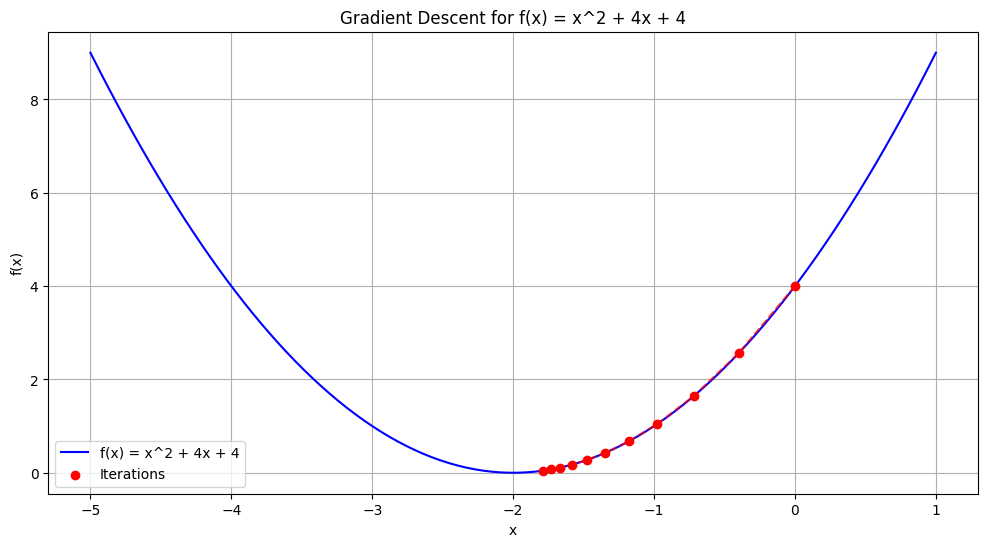

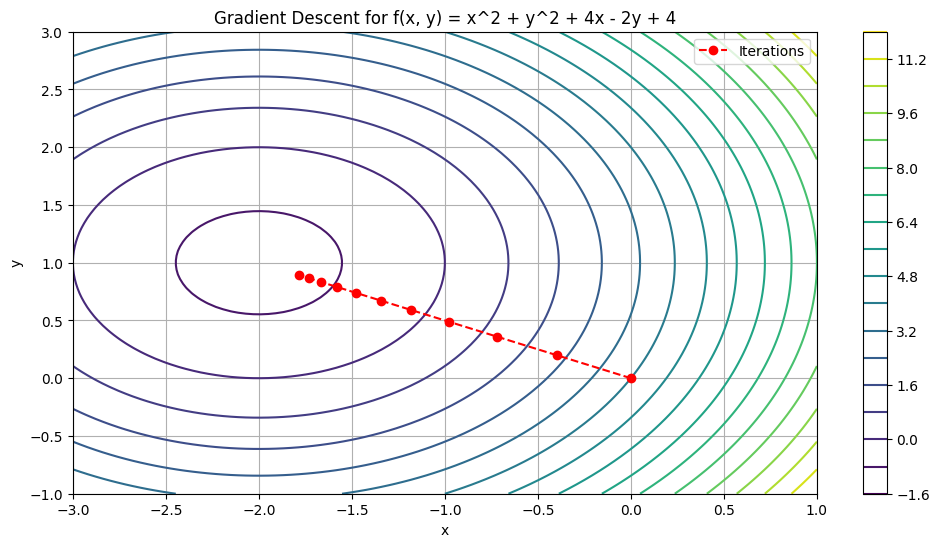

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Пример 1: Минимизация функции одной переменной f(x) = x^2 + 4x + 4
def f1(x):
    return x**2 + 4*x + 4

def df1(x):
    return 2*x + 4

# Параметры градиентного спуска
alpha = 0.1  # шаг обучения
x0 = 0  # начальное значение
num_iterations = 10  # количество итераций

# Листы для хранения значений x и f(x) на каждой итерации
x_values = [x0]
f_values = [f1(x0)]

# Градиентный спуск
x = x0
for _ in range(num_iterations):
    grad = df1(x)
    x = x - alpha * grad
    x_values.append(x)
    f_values.append(f1(x))

# Визуализация
x_range = np.linspace(-5, 1, 100)
f_range = f1(x_range)

plt.figure(figsize=(12, 6))
plt.plot(x_range, f_range, label='f(x) = x^2 + 4x + 4', color='blue')
plt.scatter(x_values, f_values, color='red', label='Iterations', zorder=5)
plt.plot(x_values, f_values, color='red', linestyle='--', alpha=0.7)
plt.title('Gradient Descent for f(x) = x^2 + 4x + 4')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

# Пример 2: Минимизация функции двух переменных f(x, y) = x^2 + y^2 + 4x - 2y + 4
def f2(x, y):
    return x**2 + y**2 + 4*x - 2*y + 4

def grad_f2(x, y):
    df_dx = 2*x + 4
    df_dy = 2*y - 2
    return np.array([df_dx, df_dy])

# Параметры градиентного спуска
alpha = 0.1  # шаг обучения
x0, y0 = 0, 0  # начальные значения
num_iterations = 10  # количество итераций

# Листы для хранения значений (x, y) и f(x, y) на каждой итерации
xy_values = [(x0, y0)]
f_values = [f2(x0, y0)]

# Градиентный спуск
x, y = x0, y0
for _ in range(num_iterations):
    grad = grad_f2(x, y)
    x, y = np.array([x, y]) - alpha * grad
    xy_values.append((x, y))
    f_values.append(f2(x, y))

# Визуализация
x_range = np.linspace(-3, 1, 100)
y_range = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = f2(X, Y)

plt.figure(figsize=(12, 6))
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.plot([v[0] for v in xy_values], [v[1] for v in xy_values], 'ro--', label='Iterations', zorder=5)
plt.title('Gradient Descent for f(x, y) = x^2 + y^2 + 4x - 2y + 4')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(contour)
plt.legend()
plt.grid()
plt.show()



На графиках выше представлена визуализация градиентного спуска для двух примеров.

1. Пример 1: Минимизация функции одной переменной $f(x) = x^2 + 4x + 4$
   - Голубая линия показывает график функции, а красные точки и пунктирная линия показывают шаги градиентного спуска.
   - Градиентный спуск приближает значение $x$ к минимуму функции, который находится в точке $x = -2$.

2. Пример 2: Минимизация функции двух переменных $f(x, y) = x^2 + y^2 + 4x - 2y + 4$
   - Контурный график функции отображает уровни функции. Красная линия и точки показывают траекторию, по которой градиентный спуск приближается к минимуму.
   - Градиентный спуск постепенно приводит к точке $(x, y) = (-2, 1)$, где функция достигает своего минимума.

### Вопросы для самостоятельной работы

1. Что такое градиентный спуск и как он работает?
2. Опишите разницу между стандартным и стохастическим градиентным спуском.
3. Какие параметры влияют на скорость сходимости градиентного спуска?
4. Что такое условия первого порядка оптимальности?
5. Каковы условия второго порядка оптимальности для функции нескольких переменных?
6. В чем разница между строгим и нестрогим локальным минимумом?
7. Приведите примеры функций, для которых градиентный спуск не сойдется.
8. Что такое матрица Гессе и как она используется в оптимизации?
9. Как можно выбрать оптимальный шаг обучения в градиентном спуске?
10. Каковы основные недостатки метода градиентного спуска?
11. В чем заключается метод Ньютонa и как он связан с градиентным спуском?
12. Какие методы можно использовать для уменьшения осцилляций при градиентном спуске?
13. Что такое адаптивные методы градиентного спуска, и какие из них вы знаете?
14. Какова роль начальных значений в градиентном спуске?
15. Приведите пример задачи оптимизации, где градиентный спуск является подходящим методом.

### Задачи для самостоятельной работы

#### Задачи на вычисление градиента и применение градиентного спуска

1. Найдите минимум функции $f(x) = x^2 - 4x + 5$ с помощью градиентного спуска. Начальное значение: $x_0 = 0$, шаг обучения $\alpha = 0.1$.
2. Используя градиентный спуск, минимизируйте функцию $f(x) = 2x^2 + 3x + 1$. Начальное значение $x_0 = -3$, шаг обучения $\alpha = 0.01$.
3. Минимизируйте функцию $f(x, y) = x^2 + 2y^2 - 4x + 4y$ с помощью градиентного спуска. Начальные значения: $x_0 = 0, y_0 = 0$, шаг обучения $\alpha = 0.1$.
4. Используя градиентный спуск, найдите минимум функции $f(x, y) = (x - 1)^2 + (y - 2)^2 + 3$. Начальные значения: $x_0 = 0, y_0 = 0$, шаг обучения $\alpha = 0.1$.
5. Найдите минимум функции $f(x) = \sin(x) + 0.5x^2$ с помощью градиентного спуска. Начальное значение: $x_0 = 0$, шаг обучения $\alpha = 0.1$.

#### Задачи на условия оптимальности

6. Для функции $f(x) = x^3 - 3x^2 + 4$ найдите точки, где производная равна нулю, и определите, являются ли они максимумами или минимумами.
7. Определите условия второго порядка для функции $f(x, y) = x^2 + 3y^2 - 4x - 6y + 7$ в точке $(1, 1)$.
8. Найдите стационарные точки функции $f(x, y) = xy + x^2 - 3y + 2$ и определите их тип.
9. Для функции $f(x, y) = x^2 + 4xy + 2y^2 - 4x - 2y$ найдите градиент и определите условия первого порядка оптимальности.
10. Приведите примеры функций, которые имеют несколько локальных минимумов. Найдите их локальные минимумы с помощью градиентного спуска.

#### Задачи на практическое применение градиентного спуска

11. Реализуйте градиентный спуск для минимизации функции потерь в линейной регрессии. Данные: $(1, 2), (2, 3), (3, 5)$.
12. Используя стохастический градиентный спуск, минимизируйте функцию потерь для линейной регрессии с 5 примерами данных.
13. Найдите минимум функции $f(x) = e^{-x^2}$ с помощью градиентного спуска. Начальное значение: $x_0 = 0$.
14. Оптимизируйте функцию $f(x, y) = x^4 + y^4 - 4x^2 - 4y^2$ с использованием градиентного спуска. Начальные значения: $x_0 = 1, y_0 = 1$.
15. Примените градиентный спуск для минимизации функции $f(x) = (x - 1)^2 + (x - 3)^2$. Начальное значение: $x_0 = 0$.

#### Задачи на анализ и теорию

16. Объясните, как выбирается шаг обучения в различных методах градиентного спуска.
17. Приведите примеры адаптивных методов градиентного спуска и обсудите их преимущества.
18. Сравните градиентный спуск с методом Ньютона. Какие преимущества и недостатки есть у каждого метода?
19. Рассмотрите проблему «плато» в градиентном спуске. Как можно обойти эту проблему?
20. Обсудите, как можно комбинировать градиентный спуск с другими методами оптимизации.

#### Задачи на комбинирование методов

21. Используйте метод Нестерова для улучшения сходимости градиентного спуска на функции $f(x) = x^2 + 4x + 4$.
22. Примените метод Adam для минимизации функции $f(x) = (x - 2)^2 + 1$. Начальное значение: $x_0 = 0$.
23. Реализуйте метод моментума для функции $f(x) = x^2 + 4x + 4$.
24. Объясните, как улучшить градиентный спуск с помощью различных техник, таких как нормализация данных или регуляризация.
25. Примените стохастический градиентный спуск для функции $f(x) = (x - 3)^2 + \cos(x)$.

#### Дополнительные задачи

26. Найдите градиент и минимизируйте функцию $f(x, y) = \ln(x^2 + y^2 + 1)$.
27. Определите градиенты и проверьте условия оптимальности для функции $f(x, y) = x^2 + y^2 + 2xy$.
28. Используя градиентный спуск, минимизируйте функцию $f(x) = x^2 + e^{-x}$.
29. Оптимизируйте функцию $f(x, y) = \sqrt{x^2 + y^2}$ с помощью градиентного спуска.
30. Найдите минимум функции $f(x, y) = x^2 + y^2 + 2xy - 2x - 2y$ с помощью градиентного спуска.

